In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import pearsonr
import nibabel as nb
import seaborn as sns
import plot_funcs

In [3]:
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)
    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()
    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    return pID, pN

# Heritability of T1wT2w maps after controlling for the mean T1wT2w scores

### SUB (Left)

In [4]:
# we will read heritability values from 1024 sub vertices
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

In [5]:
# read-in heritability scores 
fLSUB = '../solar/solar_mean_msm50_t1t2_lsub/t1t2_lsub_mean_results_herit.txt'

herit_t1t2_LSUB = pd.read_csv(fLSUB, index_col = 0, header = 0)
herit_t1t2_LSUB.index.name = 'node'

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_t1t2_LSUB.index.get_loc(nodeID)
    iB = df_herit_t1t2_LSUB.index.get_loc(nodeID)

    df_herit_t1t2_LSUB.iloc[iB]['H2r'] = herit_t1t2_LSUB.iloc[iA]['H2r']
    df_herit_t1t2_LSUB.iloc[iB]['rp']  = herit_t1t2_LSUB.iloc[iA]['rp']

dataLSUB = np.array(df_herit_t1t2_LSUB['H2r'], dtype = 'float')
pLSUB    = np.array(df_herit_t1t2_LSUB['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLSUB, q)
pID, len(np.where(dataLSUB <= pID)[0]), dataLSUB.max()

(0.0146112, 0, 0.7767771)

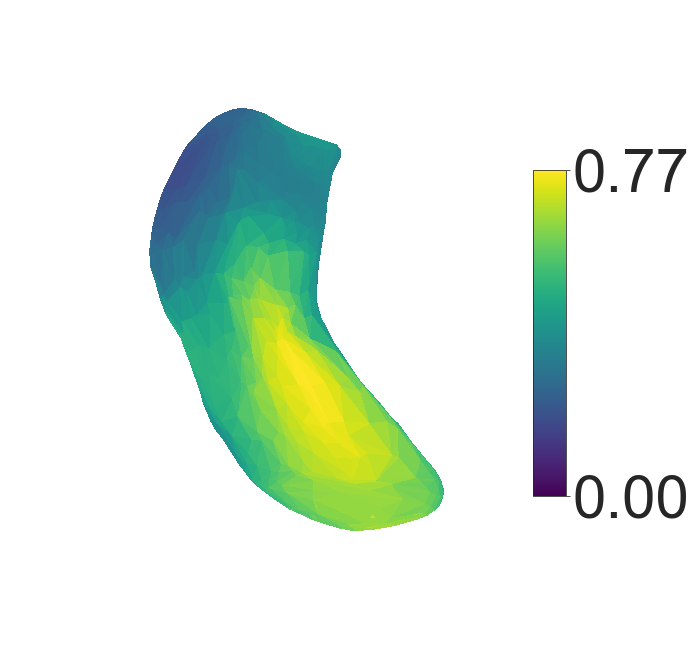

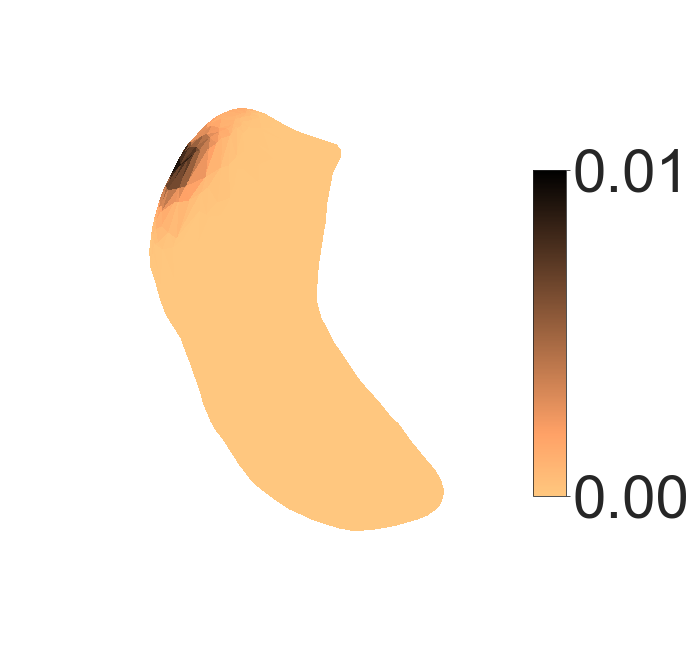

In [6]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  dataLSUB,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  pLSUB,
                                  'copper_r', 
                                  0, pID)


## CA 

In [7]:
# we will read heritability values from 2048 ca vertices
tot_node_num_lca = 2048
node_str = []
for i in range(1, tot_node_num_lca+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

In [8]:
# read-in heritability scores 
fLCA = '../solar/solar_mean_msm50_t1t2_lca/t1t2_lca_mean_results_herit.txt'

herit_t1t2_LCA = pd.read_csv(fLCA, index_col = 0, header = 0)
herit_t1t2_LCA.index.name = 'node'

for nodeID in range(1, tot_node_num_lca+1):

    iA = herit_t1t2_LCA.index.get_loc(nodeID)
    iB = df_herit_t1t2_LCA.index.get_loc(nodeID)

    df_herit_t1t2_LCA.iloc[iB]['H2r'] = herit_t1t2_LCA.iloc[iA]['H2r']
    df_herit_t1t2_LCA.iloc[iB]['rp']  = herit_t1t2_LCA.iloc[iA]['rp']

dataLCA = np.array(df_herit_t1t2_LCA['H2r'], dtype = 'float')
pLCA    = np.array(df_herit_t1t2_LCA['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLCA, q)
pID, len(np.where(dataLCA <= pID)[0]), dataLCA.max()

(0.0497812, 0, 0.6239416)

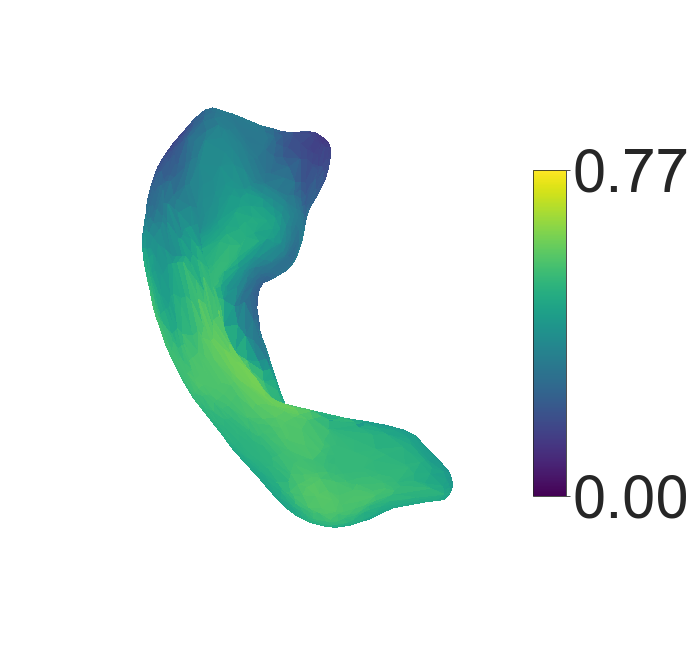

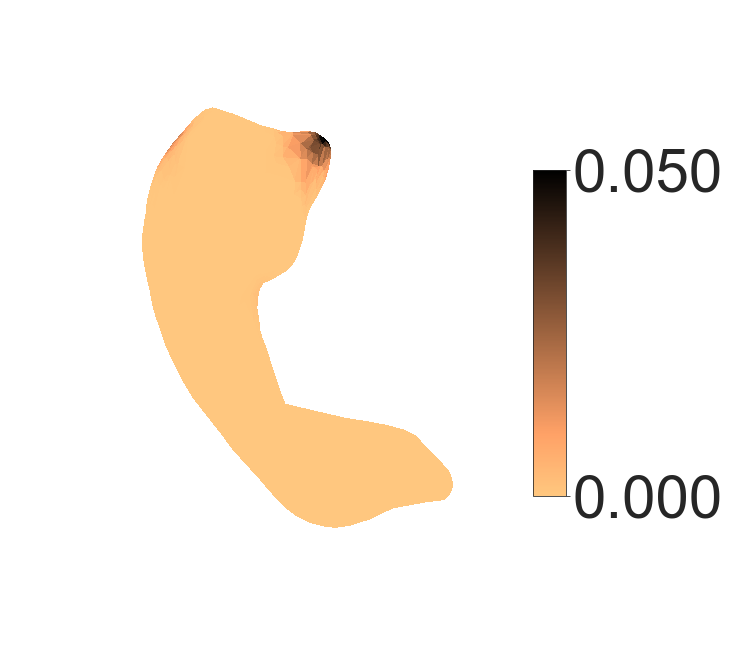

In [9]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  dataLCA,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  pLCA,
                                  'copper_r',
                                  0, pID)

## DG 

In [10]:
# we will read heritability values from 1024 sub vertices
tot_node_num_ldg = 1024
node_str = []
for i in range(1, tot_node_num_ldg+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

In [11]:
# read-in heritability scores 
fLDG = '../solar/solar_mean_msm50_t1t2_ldg/t1t2_ldg_mean_results_herit.txt'

herit_t1t2_LDG = pd.read_csv(fLDG, index_col = 0, header = 0)
herit_t1t2_LDG.index.name = 'node'

for nodeID in range(1, tot_node_num_ldg+1):

    iA = herit_t1t2_LDG.index.get_loc(nodeID)
    iB = df_herit_t1t2_LDG.index.get_loc(nodeID)

    df_herit_t1t2_LDG.iloc[iB]['H2r'] = herit_t1t2_LDG.iloc[iA]['H2r']
    df_herit_t1t2_LDG.iloc[iB]['rp']  = herit_t1t2_LDG.iloc[iA]['rp']

dataLDG = np.array(df_herit_t1t2_LDG['H2r'], dtype = 'float')
pLDG    = np.array(df_herit_t1t2_LDG['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLDG, q)
pID, len(np.where(dataLDG <= pID)[0]), dataLDG.max()

(0.0004846, 0, 0.5601656999999999)

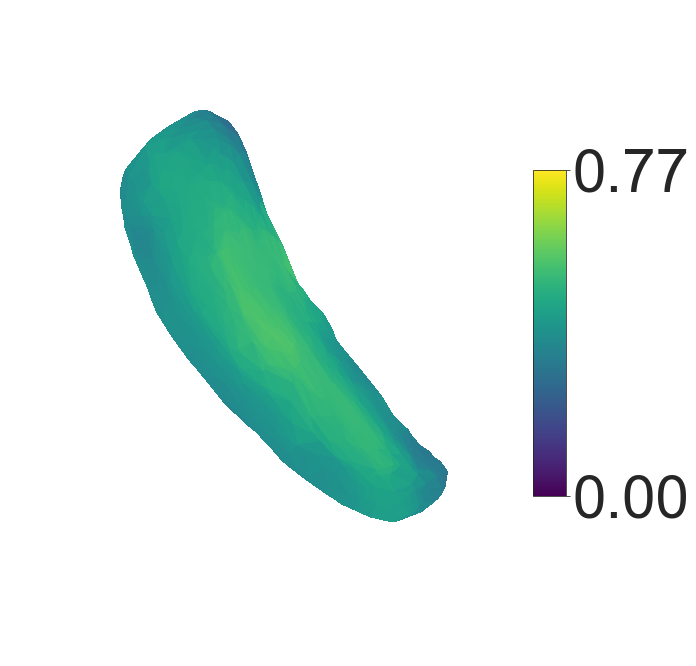

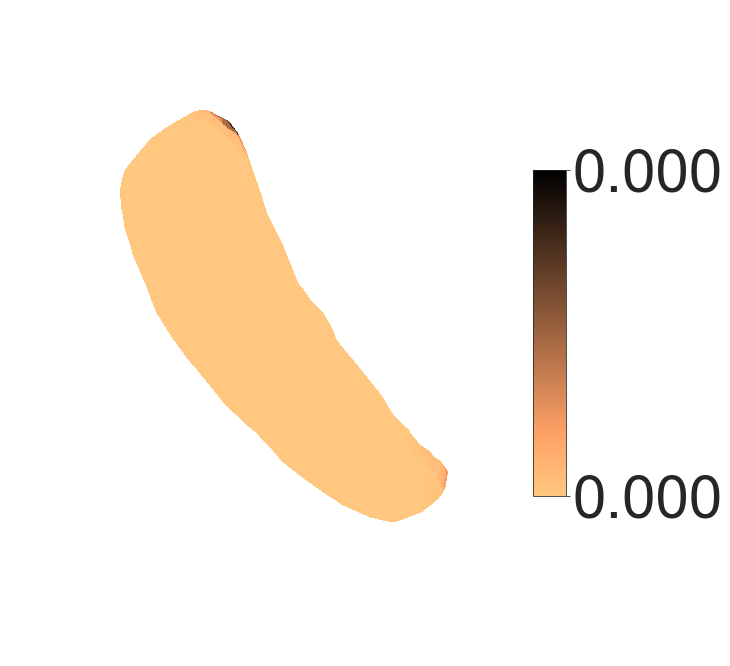

In [12]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  dataLDG,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  pLDG,
                                  'copper_r',
                                  0, pID)



## RIGHT hemisphere

In [13]:
# we will read heritability values from 1024 sub vertices
tot_node_num_rsub = 1024
node_str = []
for i in range(1, tot_node_num_rsub+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_RSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

## SUB 

In [14]:
# read-in heritability scores 
fRSUB = '../solar/solar_mean_msm50_t1t2_rsub/t1t2_rsub_mean_results_herit.txt'

herit_t1t2_RSUB = pd.read_csv(fRSUB, index_col = 0, header = 0)
herit_t1t2_RSUB.index.name = 'node'

for nodeID in range(1, tot_node_num_rsub+1):

    iA = herit_t1t2_RSUB.index.get_loc(nodeID)
    iB = df_herit_t1t2_RSUB.index.get_loc(nodeID)

    df_herit_t1t2_RSUB.iloc[iB]['H2r'] = herit_t1t2_RSUB.iloc[iA]['H2r']
    df_herit_t1t2_RSUB.iloc[iB]['rp']  = herit_t1t2_RSUB.iloc[iA]['rp']

dataRSUB = np.array(df_herit_t1t2_RSUB['H2r'], dtype = 'float')
pRSUB    = np.array(df_herit_t1t2_RSUB['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pRSUB, q)
pID, len(np.where(dataRSUB <= pID)[0]), dataRSUB.max()

(0.0014696, 0, 0.6735949000000001)

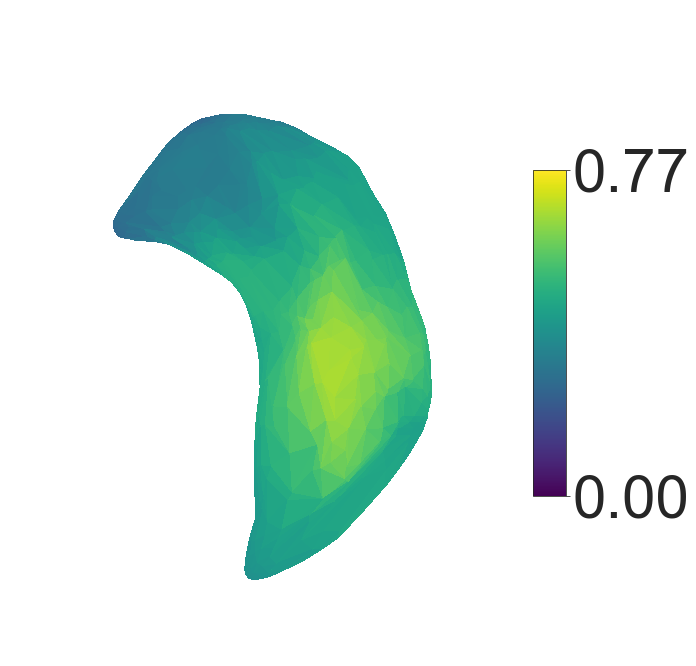

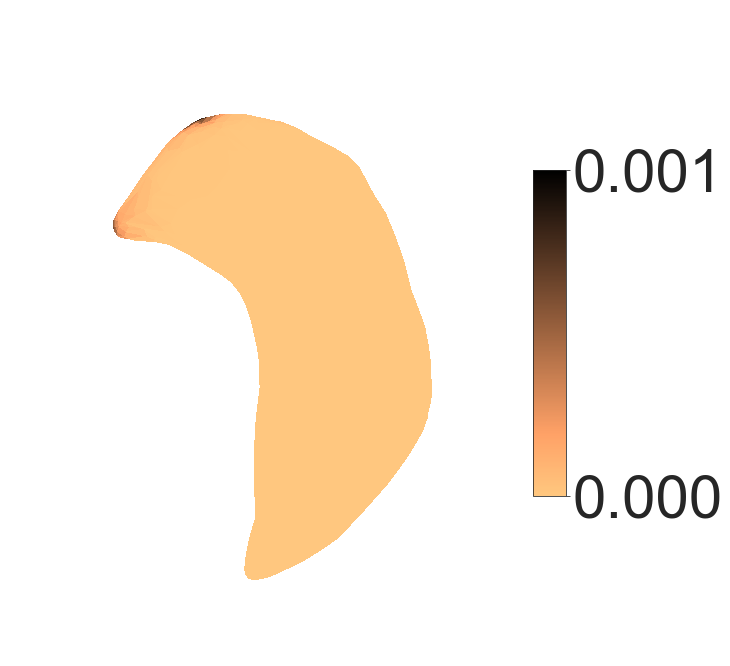

In [15]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  dataRSUB,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  pRSUB,
                                  'copper_r',
                                  0, pID)

# CA 

In [16]:
# we will read heritability values from 2048 ca vertices
tot_node_num_rca = 2048
node_str = []
for i in range(1, tot_node_num_rca+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_RCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

# read-in heritability scores 
fRCA = '../solar/solar_mean_msm50_t1t2_rca/t1t2_rca_mean_results_herit.txt'

herit_t1t2_RCA = pd.read_csv(fRCA, index_col = 0, header = 0)
herit_t1t2_RCA.index.name = 'node'

for nodeID in range(1, tot_node_num_rca+1):

    iA = herit_t1t2_RCA.index.get_loc(nodeID)
    iB = df_herit_t1t2_RCA.index.get_loc(nodeID)

    df_herit_t1t2_RCA.iloc[iB]['H2r'] = herit_t1t2_RCA.iloc[iA]['H2r']
    df_herit_t1t2_RCA.iloc[iB]['rp']  = herit_t1t2_RCA.iloc[iA]['rp']

dataRCA = np.array(df_herit_t1t2_RCA['H2r'], dtype = 'float')
pRCA    = np.array(df_herit_t1t2_RCA['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pRCA, q)
pID, len(np.where(dataRCA <= pID)[0]), dataRCA.max()

(0.0490387, 0, 0.6314890000000001)

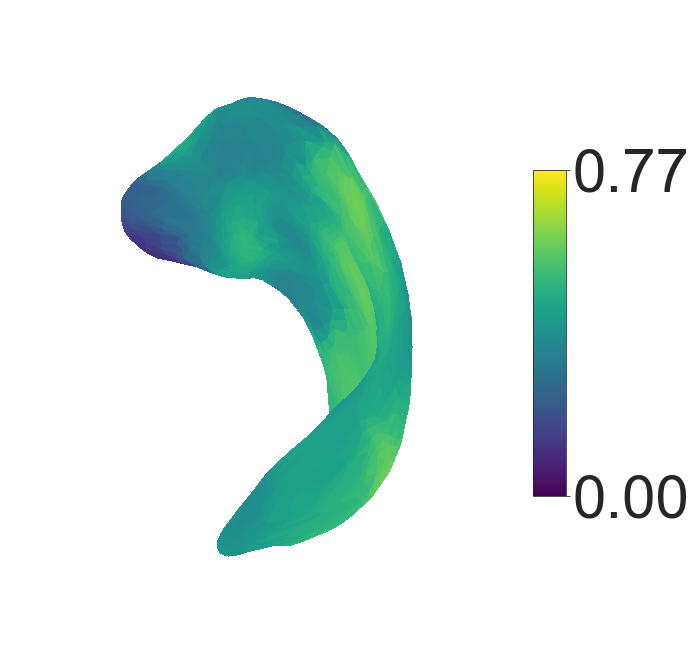

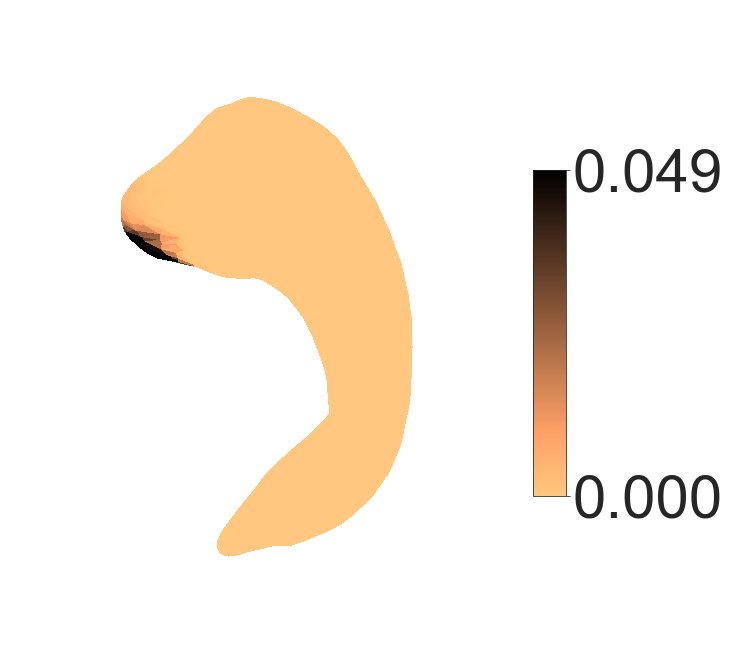

In [17]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  dataRCA,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  pRCA,
                                  'copper_r',
                                  0, pID)

## DG 

In [18]:
# we will read heritability values from 1024 sub vertices
tot_node_num_rdg = 1024
node_str = []
for i in range(1, tot_node_num_rdg+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_RDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

# read-in heritability scores 
fRDG = '../solar/solar_mean_msm50_t1t2_rdg/t1t2_rdg_mean_results_herit.txt'

herit_t1t2_RDG = pd.read_csv(fRDG, index_col = 0, header = 0)
herit_t1t2_RDG.index.name = 'node'

for nodeID in range(1, tot_node_num_rdg+1):

    iA = herit_t1t2_RDG.index.get_loc(nodeID)
    iB = df_herit_t1t2_RDG.index.get_loc(nodeID)

    df_herit_t1t2_RDG.iloc[iB]['H2r'] = herit_t1t2_RDG.iloc[iA]['H2r']
    df_herit_t1t2_RDG.iloc[iB]['rp']  = herit_t1t2_RDG.iloc[iA]['rp']

dataRDG = np.array(df_herit_t1t2_RDG['H2r'], dtype = 'float')
pRDG    = np.array(df_herit_t1t2_RDG['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pRDG, q)
pID, len(np.where(dataRDG <= pID)[0]), dataRDG.max()

(0.0001081, 0, 0.6255451999999999)

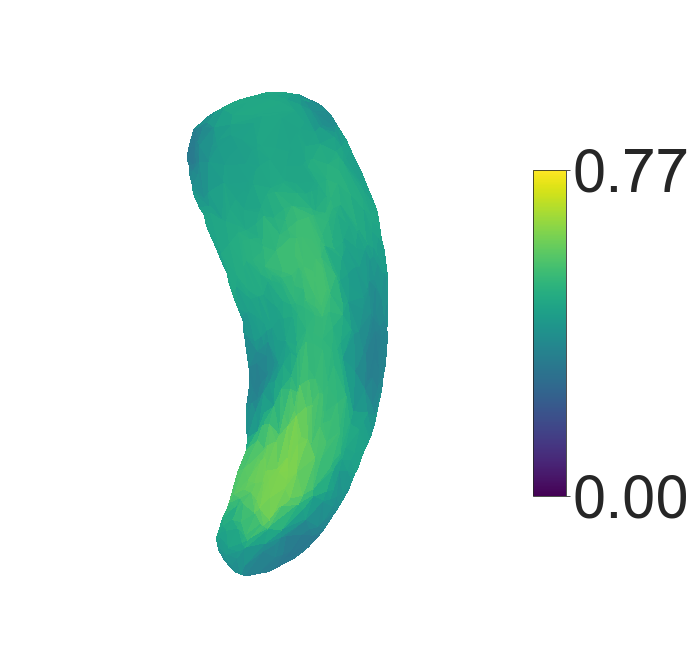

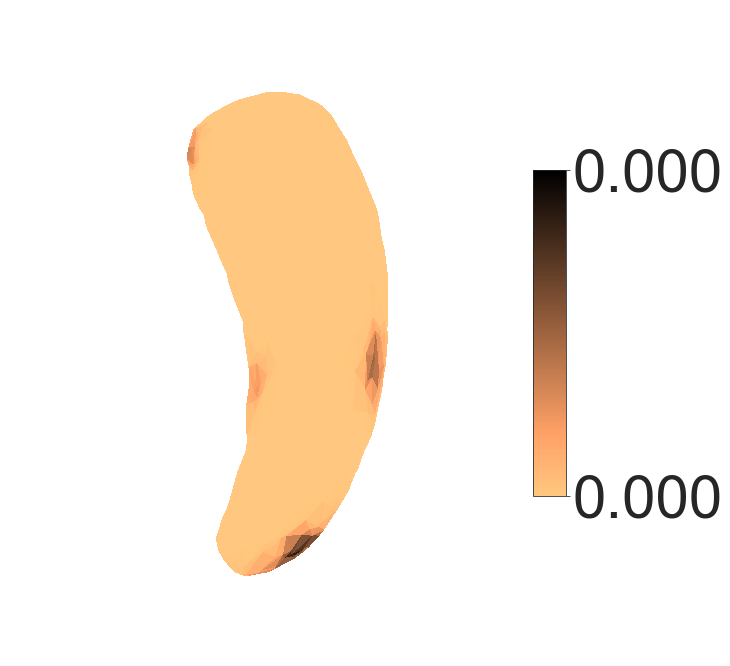

In [19]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  dataRDG,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  pRDG,
                                  'copper_r',
                                  0, pID)